In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from IPython.display import Image
from tensorflow.keras import Sequential
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets.mnist import load_data

### Načtení nul a sedmiček z datasetu MNIST

In [2]:
#(X_train, y_train), (X_test, y_test) = load_data()

#train_filter = np.where((y_train == 0 ) | (y_train == 7))
#test_filter = np.where((y_test == 0) | (y_test == 7))

#X_train, y_train = X_train[train_filter], y_train[train_filter]
#X_test, y_test = X_test[test_filter], y_test[test_filter]

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

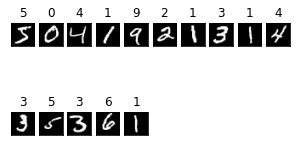

In [5]:
fig = plt.figure(figsize=(5, 3))
for i in range(15):
    ax = fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(X_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

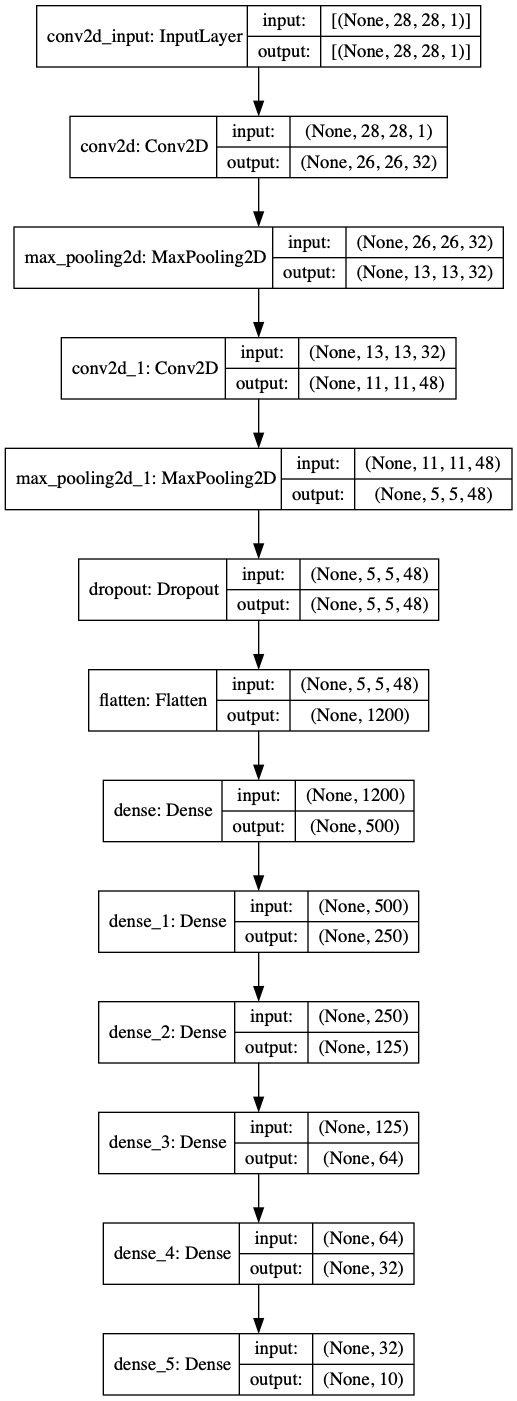

In [8]:
plot_model(model, 'model_6.jpg', show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=2, validation_split=0.1)

2022-11-29 21:09:22.701135: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-29 21:09:22.701339: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
422/422 - 9s - loss: 0.3228 - accuracy: 0.8950 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 2/50
422/422 - 8s - loss: 0.0881 - accuracy: 0.9721 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 3/50
422/422 - 9s - loss: 0.0680 - accuracy: 0.9793 - val_loss: 0.0381 - val_accuracy: 0.9872
Epoch 4/50
422/422 - 11s - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0312 - val_accuracy: 0.9910
Epoch 5/50
422/422 - 11s - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 6/50
422/422 - 9s - loss: 0.0446 - accuracy: 0.9869 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 7/50
422/422 - 9s - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0286 - val_accuracy: 0.9922
Epoch 8/50
422/422 - 8s - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0302 - val_accuracy: 0.9915
Epoch 9/50
422/422 - 8s - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0250 - val_accuracy: 0.9930
Epoch 10/50
422/422 - 8s - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0279 - val_accuracy: 0.99

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [11]:
print("Přesnost sítě je {}".format(accuracy))

Přesnost sítě je 0.9936000108718872


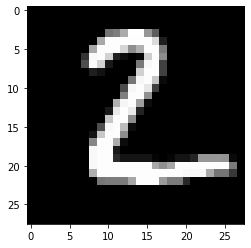

In [12]:
image = X_test[1]
plt.imshow(image, cmap='gray')

In [13]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])

In [14]:
print("Predikce sítě: {}".format(np.argmax(p)))

Predikce sítě: 2


In [15]:
model.save('./Trained_models/trained_model_8.h5')